In [9]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset from scikit-learn
iris_sklearn = load_iris()

# Create a Pandas DataFrame from the dataset
iris = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris['species'] = iris_sklearn.target

# Display the first few rows of the dataset
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Rows**: n_samples <br>
**Columns**: n_features <br>
Column 갯수: 축갯수 (차원 갯수) <br>

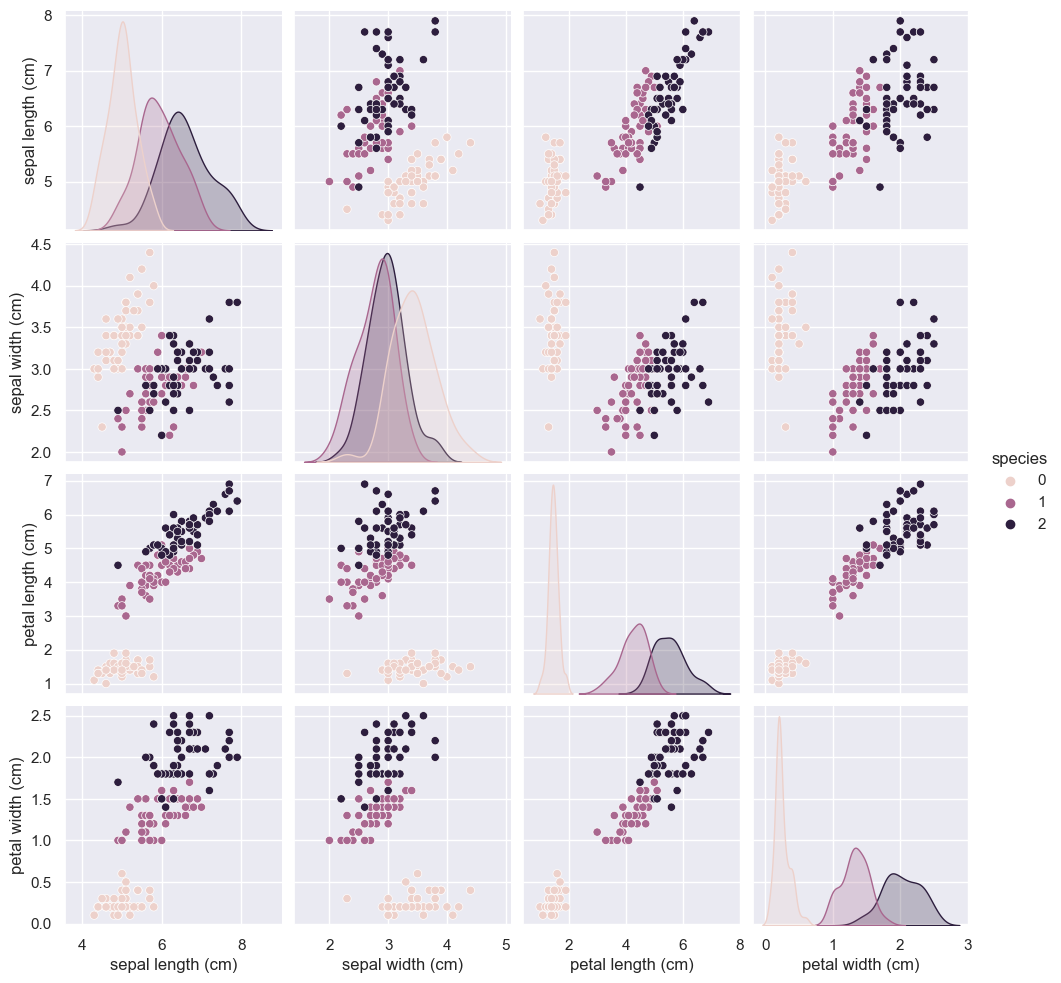

In [8]:
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
sns.pairplot(iris, hue='species', height=2.5)

# Display the plot
plt.show()

In [10]:
iris.shape

(150, 5)

In [14]:
X_iris = iris.drop('species',axis=1) # 열 삭제
y_iris  = iris['species']
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


## Scikit-Learn's Estimator API
### Basics of the API

1. Choose Model Class
```python
from sklearn.linear_model import LinearRegression
```
2. Choose model hyperparameters by instantiating this class with desired values.
```python
model = LinearRegression(fit_intercept=True)
```
3. Arrange data into a features matrix and target vector following the discussion above.
```python
X = x[:, np.newaxis] #(50,)->(50,1)
```
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
```python
model.fit(X,y)   # 객체.학습 메소드(n_samples,one feature) => a,b 찾음
model.coef_      # a, 즉 기울기
model.intercept_ # b, 즉 절편
```
5. Apply the Model to new data:
```python
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis] # x값을 [n_samples,n_features]에 맞춰야함
```
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   ```python
   yfit = model.predict(Xfit)
   ```
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.
6. Make graph:
```python
plt.scatter(x,y)
plt.plot(xfit,yfit);
```

### Supervised learning example: Simple linear regression

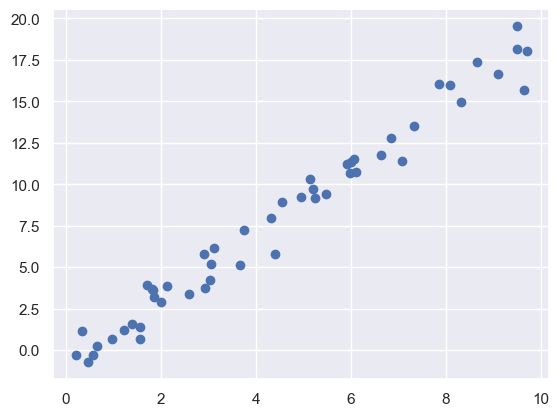

In [19]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [20]:
from sklearn.linear_model import LinearRegression as sklr

In [21]:
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]

In [24]:
model.fit(X,y)   # 객체.학습 메소드(n_samples,one feature) => a,b 찾음
print(model.coef_)      # a, 즉 기울기
print(model.intercept_) # b, 즉 절편

[1.9776566]
-0.903310725531111


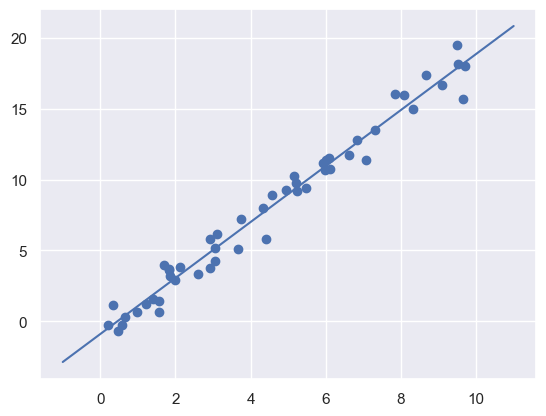

In [25]:
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis] 
yfit = model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit,yfit);

### Supervised learning example: Iris classification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset from scikit-learn
iris_sklearn = load_iris()
X_iris = iris_sklearn.data
y_iris = iris_sklearn.target

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [34]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [35]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.

In [46]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

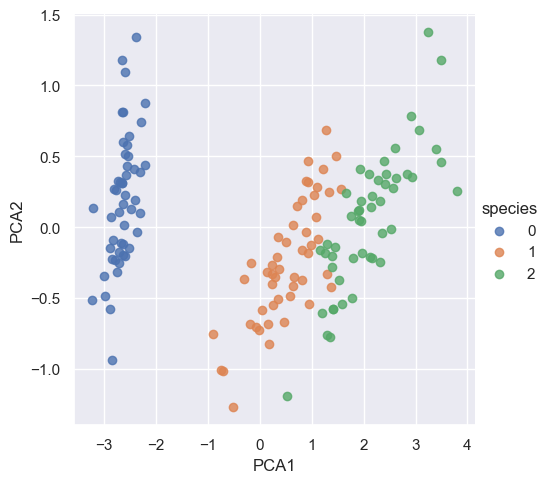

In [47]:
import seaborn as sns
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
# Create a scatter plot using seaborn
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

# 4차원(4열)에서 2차원으로 축소

### Iris Clustering

In [49]:
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

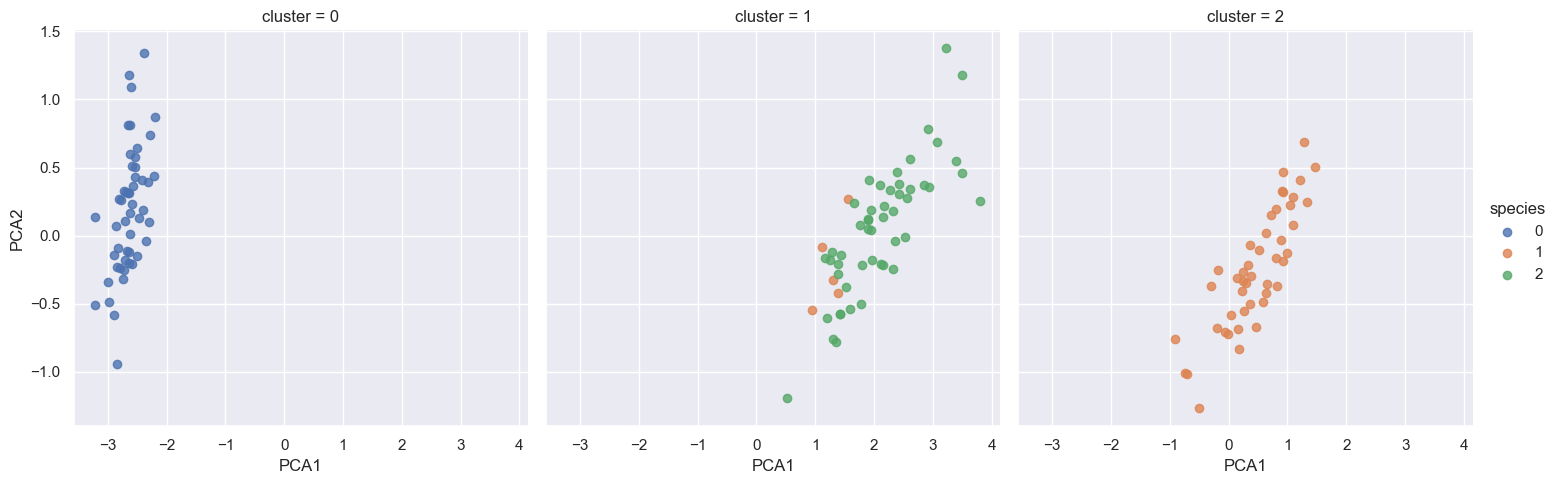

In [51]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits
### Loading and visualizing the digits data

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
#three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. 

(1797, 8, 8)

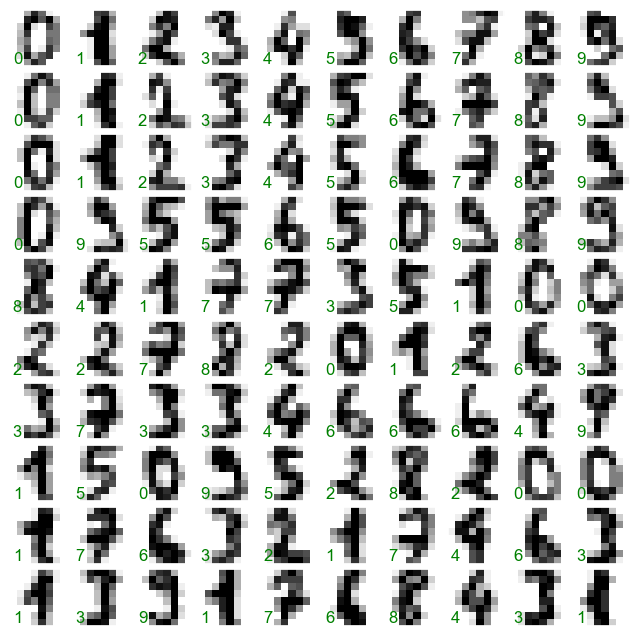

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

# Visualization of first hundred

### Unsupervised learning: Dimensionality reduction
**isomap** 다양체(manifold) 학습( 다차원->저차원)

In [59]:
from sklearn.manifold import Isomap

# Instantiate the Isomap model with a higher number of neighbors
iso = Isomap(n_components=2, n_neighbors=10)  # You can adjust the value of n_neighbors

# Fit the model to the data
iso.fit(digits.data)

# Transform the data
data_projected = iso.transform(digits.data)

# Display the shape of the transformed data
print(data_projected.shape)

(1797, 2)


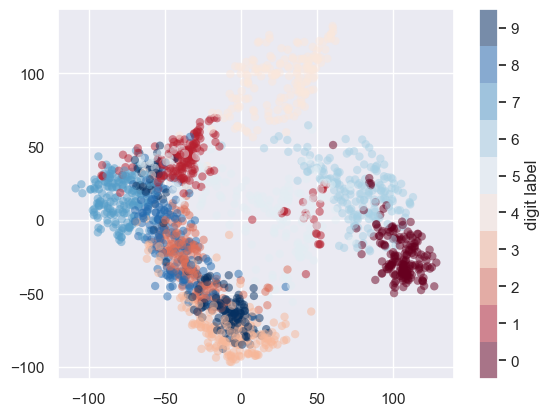

In [61]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('RdBu', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits


Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

ValueError: Unknown label type: (array([-0.7161115 , -0.29896653,  0.26520582,  0.65443493,  1.16566447,
        1.22109281,  1.4000462 ,  1.60421824,  3.21035654,  3.36710603,
        3.59937032,  3.66749887,  3.8584585 ,  4.24562734,  5.13103024,
        5.17932245,  5.80012793,  5.81548096,  6.14962364,  7.22926896,
        7.9701638 ,  8.93392551,  9.18591626,  9.40444538,  9.73011153,
       10.67206599, 10.75788366, 11.36591852, 11.3984114 , 11.51229264,
       11.74868864, 14.97193082, 15.69289556, 16.05975926, 16.66813782,
       17.38064514, 18.18565441]),)

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.

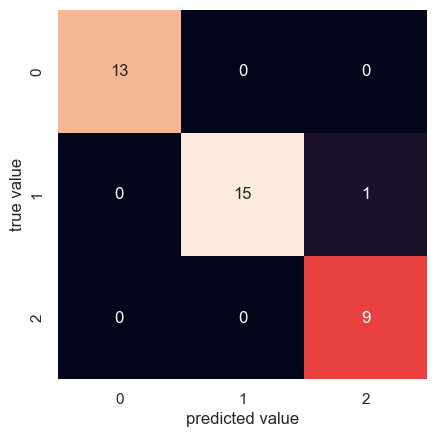

In [62]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

ValueError: cannot reshape array of size 13 into shape (8,8)

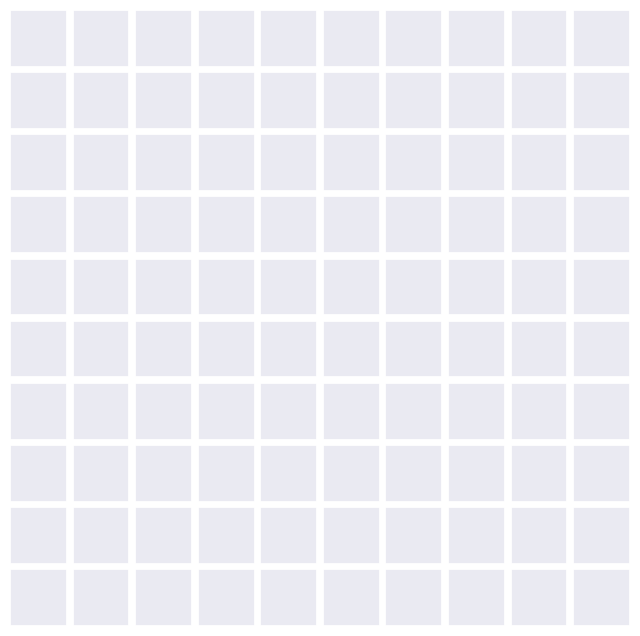

In [65]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

# 05.03 Hyperparameters and Model Validation

### Model validation the right way: Holdout sets

So what can be done?
A better sense of a model's performance can be found using what's known as a *holdout set*: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance.
This splitting can be done using the ``train_test_split`` utility in Scikit-Learn:

**K-최근접 이웃(K-Nearest Neighbor)**
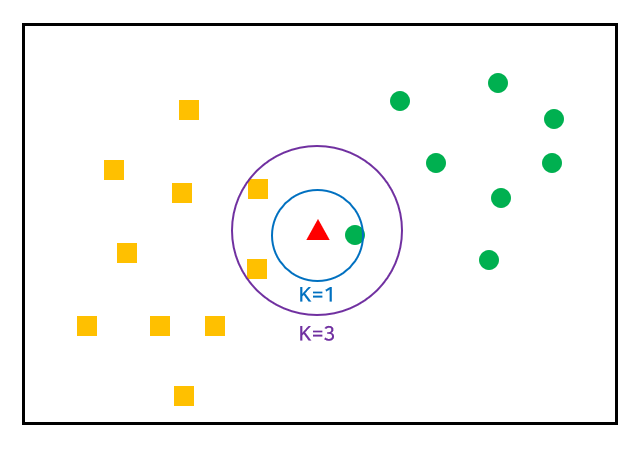

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# X란 테이블을 50%로 나누어서 각 set안에
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# 훈련데이터 입력
model.fit(X1, y1) 

# evaluate the model on the second set of data
y2_model = model.predict(X2) # y = f(X2)
accuracy_score(y2, y2_model) # |y2 - y2model| :정확도 측정

0.9066666666666666

### Model validation via cross-validation
pg.394

50%로 나누어 한쪽은 훈련, 한쪽은 validation에 사용할시 훈련데이터를 반이나 버리게 됨으로써 정확성을 떨어트린다.

해결법: 교차 검증(cross-validation) <br>

반으로 쪼개서 어느쪽을 훈련 시키고 어느쪽을 validation에 쓰느냐에 따라 결과치가 다르다 <br>
더 많이 나눌수록 측정치는 더 정확해질 수 있지만 작업량이 늘어난다
Visually, it might look something like this:
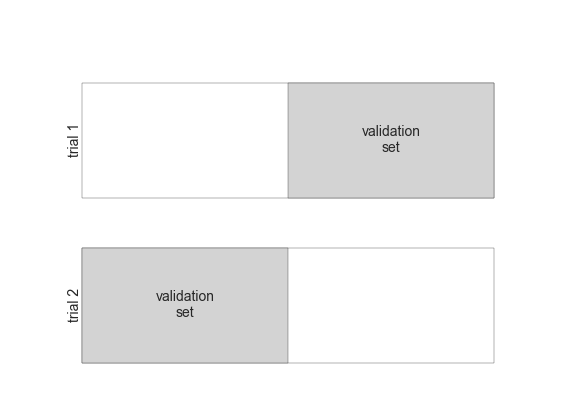![](figures/05.03-2-fold-CV.png)
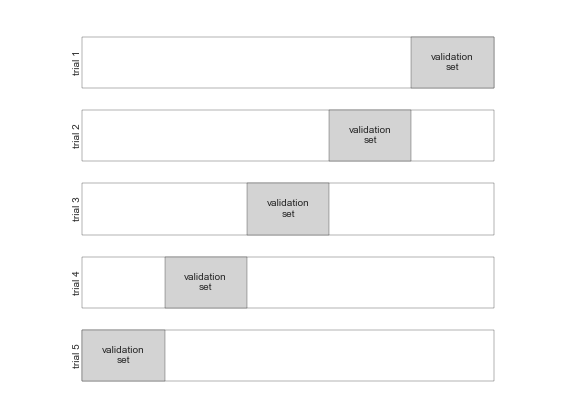

In [12]:
y2_model = model.fit(X1, y1).predict(X2) #trial 1
y1_model = model.fit(X2, y2).predict(X1) #trial 2
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

## Selecting the Best Model

Now that we've seen the basics of validation and cross-validation, we will go into a litte more depth regarding model selection and selection of hyperparameters.
These issues are some of the most important aspects of the practice of machine learning, and I find that this information is often glossed over in introductory machine learning tutorials.

Of core importance is the following question: *if our estimator is underperforming, how should we move forward?*
There are several possible answers:

- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

The answer to this question is often counter-intuitive.
In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results!
The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

### The Bias-variance trade-off

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between *bias* and *variance*.
Consider the following figure, which presents two regression fits to the same dataset:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 고편향 모델: 데이터를 **과소적합(underfit)** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 고분산 모델: 데이터를 **과적합(overfit)**
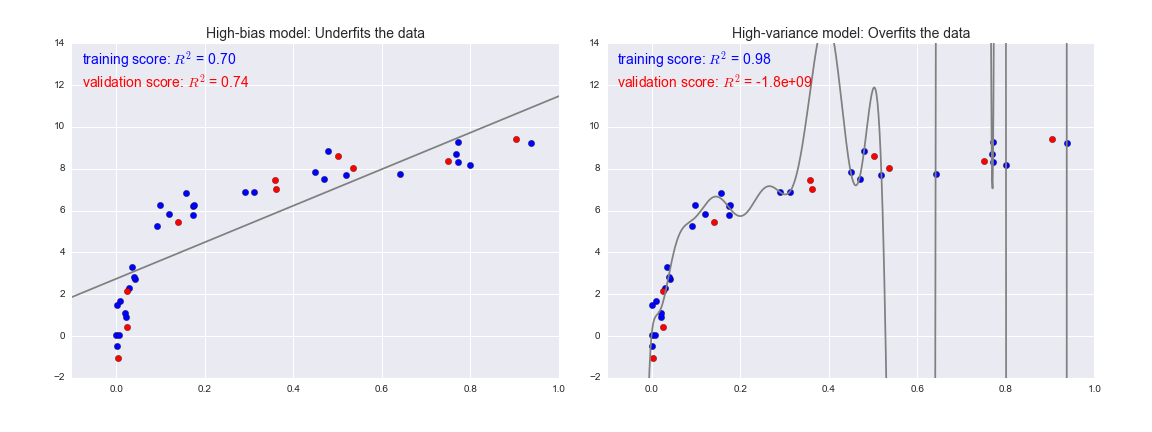

model: y=f(x)
model parameter: 기울기와 절편
https://hyen4110.tistory.com/39
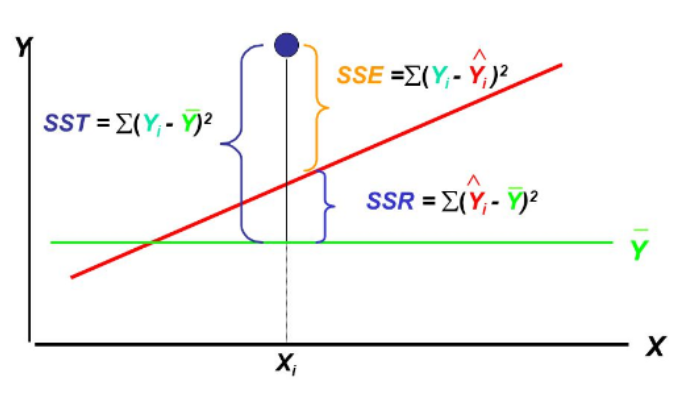
**SST(total sum of squares)**<br>
ȳ 대비 Y의 총 변동= Y의 총 변동량<br>
측정값과 평균과의 차이<br>
$$
  \sum_i \sqrt
  {x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$
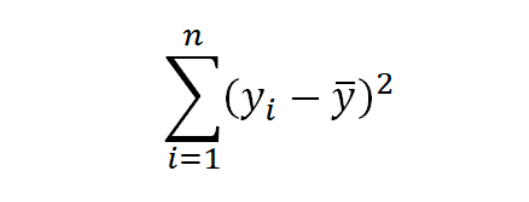

**SSR(regression sum of squares)**<br>
SST 중에서 ŷ이 Y를 설명하는 변동= X변수에 의해서 설명된 양<br>
예측값과 평균과의 차이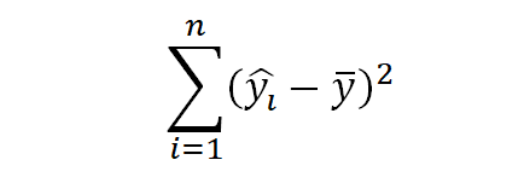

**SSE(error sum of squares)**<br>
SST 중에서 ŷ이 Y를 설명하지 못하는 변동= 에러에 의해서 설명된 양<br>
측정값과 예측값과의 차이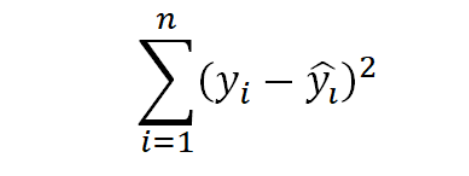

출처: https://hyen4110.tistory.com/39 [Hyen4110:티스토리]

1. 선형 회귀(Linear Regression): 선형 회귀는 종속 변수와 하나 이상의 독립 변수 간의 관계를 모델링하는 통계적 방법입니다. 기계 학습의 맥락에서는 주로 예측 분석에 사용됩니다. 목표는 입력 특성과 대상 변수 간의 최적의 선형 관계를 찾는 것입니다. (단순 선형 회귀의 경우 선, 다중 선형 회귀의 경우 초평면으로 나타낼 수 있습니다.)

2. 다항 회귀(Polynomial Regression): 다항 회귀는 선형 회귀의 확장입니다. 선형 회귀는 직선으로 관계를 모델링하는 반면, 다항 회귀는 복잡한 관계를 캡처하기 위해 다항식 함수를 사용합니다. scikit-learn의 PolynomialFeatures 클래스는 원래 특성에서 지정된 차수까지의 다항식 특성을 생성하는 데 사용됩니다.

3. make_pipeline: scikit-learn의 make_pipeline 함수는 파이프라인을 만드는 편리한 방법입니다. 파이프라인은 많은 루틴 프로세스를 간소화하는 데 사용되며, 특히 scikit-learn에서 여러 단계를 하나의 추정기로 결합하는 데 유용합니다.


4. 파이프라인 구성 요소:
- PolynomialFeatures(degree): 이 단계는 입력 데이터를 변환하여 지정된 차수까지의 다항식 특성을 추가합니다.
- LinearRegression(\**kwargs): 이 단계는 변환된 데이터에 선형 회귀 모델을 맞춥니다. \**kwargs는 LinearRegression 생성자에 추가 선택적 인수를 전달하는 데 사용됩니다.
요약하면 PolynomialRegression 함수는 다항식 특성 생성과 선형 회귀를 결합하는 scikit-learn 파이프라인을 생성하여 다항 회귀를 수행하는 편리한 방법을 제공합니다.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), # PolyFeature 주어진 차수(degree=2)의 다항식을 생성
                         LinearRegression(**kwargs)) # LinearRegression 클래스의 생성자로 선형회귀
# make-piperine(X,Y)
# X(PolyFeat)-> Y(LinRegress)

In [15]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

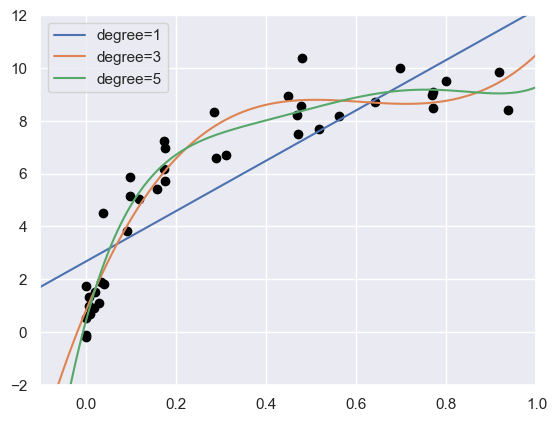

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Text(0, 0.5, 'score')

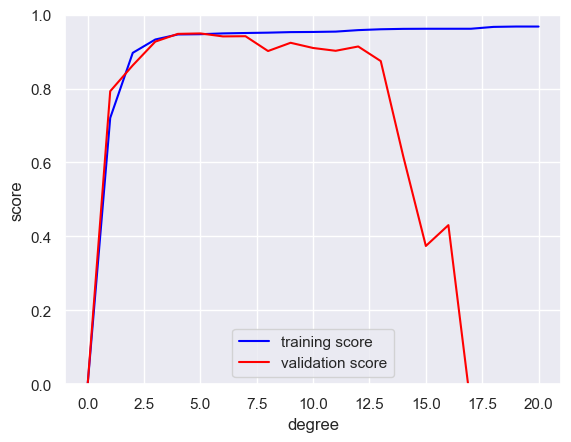

In [19]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Rest of your code remains unchanged
degree = np.arange(0, 21)

# Use validation_curve to compute training and validation scores for different polynomial degrees
param_name = 'polynomialfeatures__degree'
param_range = degree

train_score, val_score = validation_curve(
    PolynomialRegression(),  # Polynomial regression model
    X,  # Input features
    y,  # Target variable
    param_name=param_name,  # Parameter to vary (degree of PolynomialFeatures)
    param_range=param_range,  # Values of the parameter to be evaluated
    cv=7,  # Number of cross-validation folds
    scoring='explained_variance'  # You can use different scoring metrics based on your needs
)

# Plot the training and validation scores
plt.plot(param_range, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

# 모든 점을 따랐을때 검증데이타에서 과적합 문제가 발생한다

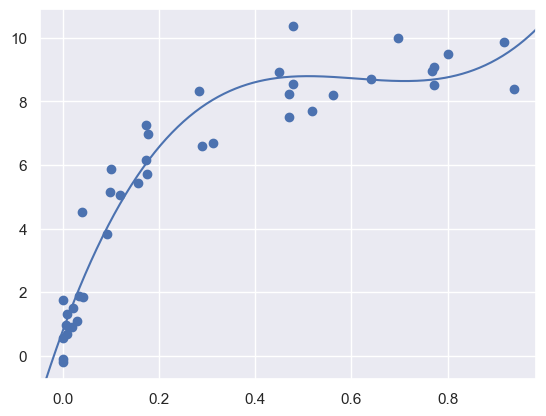

In [20]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

[One-Hot-Encoding]("https://velog.io/@pheol9166/%EC%9B%90-%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9One-hot-Encoding#:~:text=%EC%9B%90%2D%ED%95%AB%20%EC%9D%B8%EC%BD%94%EB%94%A9%EC%9D%80%20%EB%8B%A8%EC%96%B4,%EB%B0%B0%EC%97%B4%EB%A1%9C%20%ED%91%9C%ED%98%84%ED%95%9C%EB%8B%A4%EB%8A%94%20%EA%B2%83%EC%9D%B4%EC%A3%A0.")